# Figure 1

### Example data-set is from a single session (Tre-Gcamp-CaMKII mouse) recorded in S1 and V1.
    
    session name: 171102_JC048_2P_JC
    recording areas: V1 and S1
    experiment: bandpass_noise_sf_tuning_whiskers
    There are also RL and AL sessions. 


### Figures for S1 and V1 puff (1500 cells df/f)
    
    Sorted by response amplitude to the puff stimuli
    In fig-response-to-puff-examples/average_response_{session_name}.pdf
    
### Quantification for S1 and V1 puff responses (scatters)

    In fig-response-to-puff-examples/response_amplitude_{session_name}.pdf
    
### All cells in V1 and S1 and the selection criteria for cells with >5% peak df/f



In [1]:
from djexpcode import *
import os
from os.path import join as pjoin

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'S1')
v1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'V1')
alkey = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'AL')
rlkey = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'RL')

from djexpcode.schemas import *
# Load data set from datajoint
s1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & s1key).fetch()
v1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & v1key).fetch()
rlpuffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & v1key).fetch()
alpuffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & v1key).fetch()

s1d = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & s1key).fetch()
v1d = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & v1key).fetch()

# To save pdfs and pngs (pngs for git)
pdfsavepath = os.path.abspath(pjoin('figure1,fig-response-to-puff-examples'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)
import djexpcode

pngsavepath = os.path.abspath(pjoin(os.path.dirname(os.path.dirname(djexpcode.__file__)),'figures/figure1'))
if not os.path.isdir(pngsavepath):
    os.mkdir(pngsavepath)
    print(pngsavepath)

pdfsavepath = os.path.abspath(pjoin(pngsavepath,'pdf'))
if not os.path.isdir(pdfsavepath):
    os.mkdir(pdfsavepath)
    print(pdfsavepath)
# For exporting notebook to bitbucket
% matplotlib inline


/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/ndimage/morphology.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[slc] = structure != 0


Connecting root@localhost:3306


In [2]:
# Prepare dataset
s1resp = np.stack(s1puffs['puff_df_f']).mean(axis = 1)
v1resp = np.stack(v1puffs['puff_df_f']).mean(axis = 1)

s1respamp  = np.stack(s1puffs['puff_response_amplitude'])
v1respamp  = np.stack(v1puffs['puff_response_amplitude'])

### Colormaps of average response amplitude for the airpuff stimuli

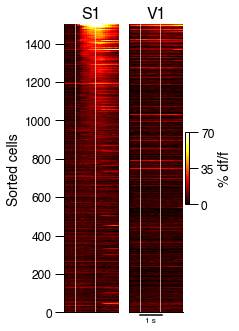

In [3]:
fnames = []

impar = dict(aspect = 'auto',clim = [0,70],cmap='hot')
nmax = 1500

fig = plt.figure(figsize=[3,5])
fig.add_axes([0.3,0.1,0.25,0.8])  # S1

x = s1puffs
dt = x['puff_dt'][0]
wpre = x['puff_wpre'][0]
wpost = x['puff_wpost'][0]
stimdur = np.max(x['puff_duration'][0])
ptime = np.linspace(-1*wpre*dt,wpost*dt,wpre+wpost)
idx = np.flipud(np.argsort(x['puff_ev']))
idx = np.flipud(np.argsort(s1respamp))

plt.imshow(s1resp[idx][1:nmax],
           extent = [ptime[0],ptime[-1],0,nmax],
           **impar)
plt.plot(np.array([0,0]),np.array([0,nmax]),'w',lw = 0.6)
plt.plot(np.array([stimdur,stimdur]),np.array([0,nmax]),'w',lw = 0.6)

plt.ylabel('Sorted cells')
plt.xticks([])
plt.title('S1')
plt.axis([-0.5,2,0,nmax])
fig.add_axes([0.6,0.1,0.25,0.8]) # V1

x = v1puffs
dt = x['puff_dt'][0]
wpre = x['puff_wpre'][0]
wpost = x['puff_wpost'][0]
stimdur = np.max(x['puff_duration'][0])
ptime = np.linspace(-1*wpre*dt,wpost*dt,wpre+wpost)

idx = np.flipud(np.argsort(v1respamp))
im = plt.imshow(v1resp[idx][1:nmax],
               extent = [ptime[0],ptime[-1],0,nmax],
               **impar)
plt.plot(np.array([0,0]),np.array([0,nmax]),'w',lw = 0.6)
plt.plot(np.array([stimdur,stimdur]),np.array([0,nmax]),'w',lw = 0.6)

plt.xticks([]);plt.yticks([]);plt.title('V1');plt.axis([-0.5,2,0,nmax])

plt.plot([0,1],-nmax*0.01+np.array([0,0]),'k',clip_on=False)
plt.text(0.5,-nmax*0.015,'1 s',fontsize=8,va='top',ha='center')

cb = fig.add_axes([0.86,0.4,0.015,0.2])     # colorbar
cb = plt.colorbar(im,cax = cb,label='% df/f')
cb.set_ticks([0,35,70])

fnames.append(pjoin(pngsavepath,'fig1_puff_average_response_{session_name}.png'.format(**s1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_puff_average_response_{session_name}.pdf'.format(**s1key)))
fig.savefig(fnames[-1]);

### Traces overlay in response to the airpuffs

In [4]:
x = np.stack(s1puffs['puff_df_f'])
dt = s1puffs['puff_dt'][0]
wpre = s1puffs['puff_wpre'][0]
wpost = s1puffs['puff_wpost'][0]
stimdur = np.max(s1puffs['puff_duration'][0])
ptime = np.linspace(-1*wpre*dt,wpost*dt,wpre+wpost)

idx = np.flipud(np.argsort(s1respamp))
ii = (s1respamp[idx]>5)
tidx = (ptime>=-0.8) & (ptime<=3)


fig = plt.figure(figsize = [2,2.])
fig.add_axes([0.1,0.3,0.58,0.4])
plt.fill_between([0,1],-10,170,alpha = 0.5,color=colors[2],clip_on=False,lw=0)

plt.plot(ptime[tidx],s1resp[idx][~ii].T[tidx,:],color='gray',lw=0.3,alpha=0.3,clip_on=False);
if np.sum(ii):
    plt.plot(ptime[tidx],s1resp[idx][ii].T[tidx,:],color=colors[0],lw=0.3,alpha=1,clip_on=False);
    plt.plot(ptime[tidx],np.mean(s1resp[idx][ii],axis = 0)[tidx],color=colors[1],lw=1.5,alpha=1,clip_on=False);
plt.plot(ptime[tidx],np.mean(s1resp[idx][~ii],axis = 0)[tidx],color=colors[3],lw=1.5,alpha=0.7,clip_on=False);

plt.plot([2.4,3.4],[-10,-10],'k',clip_on = False)
plt.plot([3.4,3.4],[-10,40],'k',clip_on = False)
plt.text(3.5,15,'50% df/f',va = 'center',ha = 'left',fontsize = 8,clip_on = False)
plt.text(2.9,-15,'1 s',va = 'top',ha = 'center',fontsize = 8,clip_on = False)

plt.axis([-1,3.2,-10,100])
plt.axis('off')
plt.text(3.,100,'S1',fontsize=14,va = 'bottom',ha = 'right')

fnames.append(pjoin(pngsavepath,'fig1_average_response_traces_S1_{session_name}.png'.format(**s1key)))
fig.savefig(fnames[-1])
print('S1 cells with response amplitude > 5%df/f: {0}/{1}'.format(np.sum(ii),len(ii)))

x = np.stack(v1puffs['puff_df_f'])
dt = v1puffs['puff_dt'][0]
wpre = v1puffs['puff_wpre'][0]
wpost = v1puffs['puff_wpost'][0]
stimdur = np.max(v1puffs['puff_duration'][0])
ptime = np.linspace(-1*wpre*dt,wpost*dt,wpre+wpost)
idx = np.flipud(np.argsort(v1respamp))


fig = plt.figure(figsize = [2,2])
fig.add_axes([0.1,0.3,0.58,0.4])
plt.fill_between([0,1],-10,170,alpha = 0.5,color=colors[2],clip_on=False,lw=0)

ii = (v1respamp[idx]>5)
tidx = (ptime>=-0.8) & (ptime<=3)

plt.plot(ptime[tidx],v1resp[idx][~ii].T[tidx,:],color='gray',lw=0.3,alpha=0.3,clip_on=False);
if np.sum(ii):
    plt.plot(ptime[tidx],v1resp[idx][ii].T[tidx,:],color=colors[0],lw=0.3,alpha=1,clip_on=False);
    plt.plot(ptime[tidx],np.mean(v1resp[idx][ii],axis = 0)[tidx],color=colors[1],lw=1.5,alpha=1,clip_on=False);
plt.plot(ptime[tidx],np.mean(v1resp[idx][~ii],axis = 0)[tidx],color=colors[3],lw=1.5,alpha=0.7,clip_on=False);

plt.plot([2.4,3.4],[-10,-10],'k',clip_on = False)
plt.plot([3.4,3.4],[-10,40],'k',clip_on = False)
plt.text(3.5,15,'50% df/f',va = 'center',ha = 'left',fontsize = 8,clip_on = False)
plt.text(2.9,-15,'1 s',va = 'top',ha = 'center',fontsize = 8,clip_on = False)
print('V1 cells with response amplitude > 5% df/f: {0}/{1}'.format(np.sum(ii),len(ii)))
plt.axis([-1,3.2,-10,100])

plt.axis('off')
plt.text(3.,100,'V1',fontsize=14,va = 'bottom',ha = 'right')
fnames.append(pjoin(pngsavepath,'fig1_average_response_traces__V1_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1])
fnames.append(pjoin(pdfsavepath,'fig1_average_response_traces__V1_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1])


S1 cells with response amplitude > 5%df/f: 470/1793
V1 cells with response amplitude > 5% df/f: 19/3009


### Puff response amplitude# Visual stimuli; comparisson with airpuff and scatters

#### Scatter of puff response versus peak response 

Same as above but for visual stimuli. Visual stimuli is the one of 8 TF/SF combinations that has the higher response.

In fig s1_response_amplitude_{session_name}.pdf

#### Scatter of puff response versus peak response 

For S1 in black and V1 in red

In fig scatter_response_amplitude_{session_name}.pdf

In [5]:
s1vis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & s1key).fetch()
v1vis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & v1key).fetch()
# V1 response amplitudes
v1resps,v1stimtime,v1stimdur = VisualStimuli().sortedStimuliResponses(v1vis)
nstims = len(v1resps)
v1visrespamp  = [computeMeanResponse(np.stack(v1resps[i]),v1stimtime[i],v1stimdur[i],0.1,-1) for i in range(nstims)]
# S1 response amplitudes to different stim
s1resps,s1stimtime,s1stimdur = VisualStimuli().sortedStimuliResponses(s1vis)
s1visrespamp  = [computeMeanResponse(np.stack(s1resps[i]),s1stimtime[i],s1stimdur[i],0.1,-1) for i in range(nstims)]

/home/joao/lib/djexpcode-tacnav/djexpcode/calciumutils.py:307: RuntimeWarning: Mean of empty slice
  baselines = np.nanmean(responses[:,:,(rtime>baselinetime) & (rtime<=0)],axis = 2)
/home/joao/lib/djexpcode-tacnav/djexpcode/calciumutils.py:308: RuntimeWarning: Mean of empty slice
  peaks = np.nanmean(responses[:,:,(rtime<=stimduration + offset) & (rtime>0)],axis = 2)


In [6]:
fig = plt.figure(figsize=[2,2])
fig.add_axes([0.4,0.2,0.5,0.7])
cliplim = [-10,50]
plts = plotScatterMultipleVariables([s1respamp,
                                     np.nanmean(np.stack(s1visrespamp).transpose([1,0])[:,:8],axis=1)]
                                     ,[-10,50],['airpuff','visual'])
for p in plts:
    p[0].set_markerfacecolor('k')
plt.ylabel('Response amplitude \n (df/f %)')
plt.text(-0.3,30,'S1 ({0} cells)'.format(len(s1visrespamp[0])),fontsize = 6)
#plt.text(-0.3,20,'V1 ({0} cells)'.format(len(v1visrespamp[0])),fontsize = 6)
plt.xticks(rotation=90)
fnames.append(pjoin(pngsavepath,'fig1_average_amplitudes_S1_{session_name}.png'.format(**s1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_average_amplitudes_S1_{session_name}.pdf'.format(**s1key)))
fig.savefig(fnames[-1]);

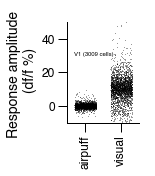

In [7]:
# Response scatter
fig = plt.figure(figsize=[2,2])
fig.add_axes([0.4,0.2,0.5,0.7])
cliplim = [-10,50]
plts = plotScatterMultipleVariables([v1respamp,
                                     np.nanmean(np.stack(v1visrespamp).transpose([1,0])[:,:8],axis=1)]
                                     ,[-10,50],['airpuff','visual'])
for p in plts:
    p[0].set_markerfacecolor('k')
plt.ylabel('Response amplitude \n (df/f %)')
plt.text(-0.3,30,'V1 ({0} cells)'.format(len(v1visrespamp[0])),fontsize = 6)
#plt.text(-0.3,20,'V1 ({0} cells)'.format(len(v1visrespamp[0])),fontsize = 6)
plt.xticks(rotation=90)

fnames.append(pjoin(pngsavepath,'fig1_average_amplitudes_V1_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_average_amplitudes_V1_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1]);


In [8]:
s1peakvisrespamp,v1peakvisrespamp = [np.nanmax(np.stack(s1visrespamp).transpose([1,0])[:,:8],axis=1),
                                     np.nanmax(np.stack(v1visrespamp).transpose([1,0])[:,:8],axis=1)]

markerpar = dict(clip_on = False,
                 markersize=2,
                 alpha = 0.5,
                 lw = 0,
                 markeredgecolor = 'none')

fig = plt.figure(figsize=[2.5,2.5])
fig.add_axes([0.4,0.4,0.5,0.5])

clims = [-10,50]
plt.plot(np.clip(s1peakvisrespamp,*clims),np.clip(s1respamp,*clims),'o',**markerpar,label = 'S1')
plt.plot(np.clip(v1peakvisrespamp,*clims),np.clip(v1respamp,*clims),'o',**markerpar,label = 'V1')
plt.axis([clims[0],clims[1],clims[0],clims[1]])
plt.xlabel('Visual response \n peak df/f')
plt.ylabel('Puff response \n peak df/f')
plt.xticks([0,20,40])
plt.yticks([0,20,40])
plt.legend()
fnames.append(pjoin(pngsavepath,'fig1_scatter_V1_S1_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_scatter_V1_S1_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1]);

#### Average responses to visual stimuli of all cells in V1 and S1

Sorted by response amplitude to the visual stimuli. 
Displays the stim with larger response.

S1 cells: 1793
V1 cells: 3009

In figure: *visual_average_response_{session_name}.pdf*

Also trimmed to 1500 cells.

V1 cells : 3009 ; S1 cells: 1793


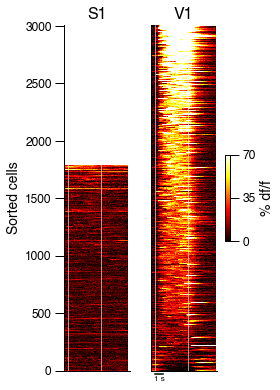

In [9]:
impar = dict(aspect = 'auto',clim = [0,70],cmap='hot')
nmax = len(v1peakvisrespamp)

s1peakvisrespampidx = np.argmax(np.nanmean(np.nanmean(np.stack(s1resps[:8]),axis=2),axis=2),axis = 0)
v1peakvisrespampidx = np.argmax(np.nanmean(np.nanmean(np.stack(v1resps[:8]),axis=2),axis=2),axis = 0)

tmp = np.stack([s1resps[i] for i in range(8)])
meanmaxresp = []
for c,k in enumerate(s1peakvisrespampidx):
    meanmaxresp.append(np.nanmean(tmp[k,c,:,:],axis = 0))
s1resp = np.stack(meanmaxresp)

tmp = np.stack([v1resps[i] for i in range(8)])
meanmaxresp = []
for c,k in enumerate(v1peakvisrespampidx):
    meanmaxresp.append(np.nanmean(tmp[k,c,:,:],axis = 0))
v1resp = np.stack(meanmaxresp)

stimdur = np.max(s1stimdur[0])
ptime = s1stimtime[0]


idx = np.flipud(np.argsort(s1peakvisrespamp))

fig = plt.figure(figsize=[4,6])     # S1
fig.add_axes([0.28,0.1,0.23,0.8])
plt.imshow(s1resp[idx][0:np.clip(nmax,0,len(s1resp))],
           extent = [ptime[0],ptime[-1],0,np.clip(nmax,0,len(s1resp))],
           **impar)
plt.plot(np.array([0,0]),np.array([0,nmax]),'w',lw = 0.6)
plt.plot(np.array([stimdur,stimdur]),np.array([0,nmax]),'w',lw = 0.6)
plt.ylabel('Sorted cells')
plt.xticks([])
plt.title('S1')
plt.axis([-0.5,7.5,0,nmax])
fig.add_axes([0.58,0.1,0.23,0.8])

stimdur = np.max(v1stimdur[0])
ptime = v1stimtime[0]

idx = np.flipud(np.argsort(v1peakvisrespamp))
im = plt.imshow(v1resp[idx][0:nmax],
               extent = [ptime[0],ptime[-1],0,nmax],
               **impar)
plt.plot(np.array([0,0]),np.array([0,nmax]),'w',lw = 0.6)
plt.plot(np.array([stimdur,stimdur]),np.array([0,nmax]),'w',lw = 0.6)

plt.xticks([])
plt.yticks([])
plt.title('V1')
plt.axis([-0.5,7.5,0,nmax])
plt.plot([0,1],-nmax*0.01+np.array([0,0]),'k',clip_on=False)
plt.text(0.5,-nmax*0.015,'1 s',fontsize=8,va='top',ha='center')

cb = fig.add_axes([0.84,0.4,0.015,0.2]) # colorbar
cb = plt.colorbar(im,cax = cb,label='% df/f')
cb.set_ticks([0,35,70])

print('V1 cells : {0} ; S1 cells: {1}'.format(len(v1resp),len(s1resp)))
fnames.append(pjoin(pngsavepath,'fig1_visual_average_response_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_visual_average_response_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1]);

V1 cells : 3009 ; S1 cells: 1793


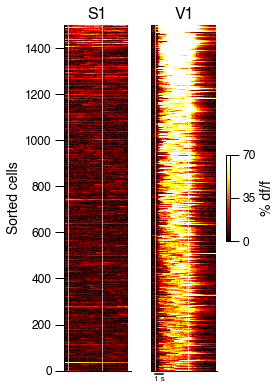

In [10]:
impar = dict(aspect = 'auto',clim = [0,70],cmap='hot')
nmax = 1500 #len(v1peakvisrespamp)

s1peakvisrespampidx = np.argmax(np.nanmean(np.nanmean(np.stack(s1resps[:8]),axis=2),axis=2),axis = 0)
v1peakvisrespampidx = np.argmax(np.nanmean(np.nanmean(np.stack(v1resps[:8]),axis=2),axis=2),axis = 0)

tmp = np.stack([s1resps[i] for i in range(8)])
meanmaxresp = []
for c,k in enumerate(s1peakvisrespampidx):
    meanmaxresp.append(np.nanmean(tmp[k,c,:,:],axis = 0))
s1resp = np.stack(meanmaxresp)

tmp = np.stack([v1resps[i] for i in range(8)])
meanmaxresp = []
for c,k in enumerate(v1peakvisrespampidx):
    meanmaxresp.append(np.nanmean(tmp[k,c,:,:],axis = 0))
v1resp = np.stack(meanmaxresp)

stimdur = np.max(s1stimdur[0])
ptime = s1stimtime[0]


idx = np.flipud(np.argsort(s1peakvisrespamp))

fig = plt.figure(figsize=[4,6])     # V1
fig.add_axes([0.28,0.1,0.23,0.8])
plt.imshow(s1resp[idx][0:np.clip(nmax,0,len(s1resp))],
           extent = [ptime[0],ptime[-1],0,np.clip(nmax,0,len(s1resp))],
           **impar)
plt.plot(np.array([0,0]),np.array([0,nmax]),'w',lw = 0.6)
plt.plot(np.array([stimdur,stimdur]),np.array([0,nmax]),'w',lw = 0.6)
plt.ylabel('Sorted cells')
plt.xticks([])
plt.title('S1')
plt.axis([-0.5,7.5,0,nmax])
fig.add_axes([0.58,0.1,0.23,0.8])

stimdur = np.max(v1stimdur[0])
ptime = v1stimtime[0]

idx = np.flipud(np.argsort(v1peakvisrespamp))
im = plt.imshow(v1resp[idx][0:nmax],
               extent = [ptime[0],ptime[-1],0,nmax],
               **impar)
plt.plot(np.array([0,0]),np.array([0,nmax]),'w',lw = 0.6)
plt.plot(np.array([stimdur,stimdur]),np.array([0,nmax]),'w',lw = 0.6)

plt.xticks([])
plt.yticks([])
plt.title('V1')
plt.axis([-0.5,7.5,0,nmax])
plt.plot([0,1],-nmax*0.01+np.array([0,0]),'k',clip_on=False)
plt.text(0.5,-nmax*0.015,'1 s',fontsize=8,va='top',ha='center')

cb = fig.add_axes([0.84,0.4,0.015,0.2]) # colorbar
cb = plt.colorbar(im,cax = cb,label='% df/f')
cb.set_ticks([0,35,70])

print('V1 cells : {0} ; S1 cells: {1}'.format(len(v1resp),len(s1resp)))
fnames.append(pjoin(pngsavepath,'fig1_visual_average_response_trimmed_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_visual_average_response_trimmed_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1]);

### Response amplitude in the widefield image for planes in S1 V1 RL and AL 
For airpuff and visual stimuli 

In [11]:
# Plot the figure with match FOVs (dot color is amplitude)
from matplotlib.colors import LinearSegmentedColormap,ListedColormap

k = {'session_name':'171102_JC048_2P_JC',
            'projtype':'std',
            'plane':3}
projdata = (TwoPhotonProjection() * TwoPhotonVolume() & 
            'session_name = "171102_JC048_2P_JC"' &
            'projtype = "std"' &
            'plane = 3').fetch()
refim = imread('/quadraraid/data/1photon/raw/171102_JC048_1P_JC/run01_bandpass_noise_circle_retino_whiskers/20171102_run000_00000000.tif').mean(axis = 0)

black2red=LinearSegmentedColormap.from_list('black2red', ['gray', 'red'],N = 10)
black2red_cmap = black2red(np.arange(black2red.N))
black2red_cmap[:,-1] = np.linspace(0.3, 1, black2red.N)
black2red_cmap[40:,-1] = 1
black2red = ListedColormap(black2red_cmap)
spar = dict(vmax = 150,vmin=0,cmap = black2red)

fig = plt.figure()
plt.imshow(refim,cmap='gray')
# S1
p = [48,160]
mag = [0.18087641500176088, 1.3923445320585912, 99.0]
    
ref2p = np.array(projdata[projdata['recording_area'] == 'S1']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'S1')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

s1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & s1key).fetch()

s1resp = np.stack(s1puffs['puff_response_amplitude'])
idx = s1resp>5
idx = np.argsort(s1resp)
plt.scatter(cent[idx,0],cent[idx,1],
            15*(s1resp[idx]-np.min(s1resp))/np.max(s1resp),s1resp[idx],**spar)

# V1
p = [312,192]
mag = [0.18087641500176088, 1.3784210867380053, 99.0]

ref2p = np.array(projdata[projdata['recording_area'] == 'V1']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'V1')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

s1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & s1key).fetch()

s1resp = np.stack(s1puffs['puff_response_amplitude'])
idx = s1resp>5
idx = np.arange(len(s1resp))
idx = np.argsort(s1resp)
plt.scatter(cent[idx,0],cent[idx,1],
            15*(s1resp[idx]-np.min(s1resp))/np.max(s1resp),s1resp[idx],**spar)

# RL
p = [100, 138]
mag = [0.18087641500176088, 1.3923445320585912, 99.0]
ref2p = np.array(projdata[projdata['recording_area'] == 'RL']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'RL')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

s1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & s1key).fetch()

s1resp = np.stack(s1puffs['puff_response_amplitude'])
idx = s1resp>5
idx = np.arange(len(s1resp))
idx = np.argsort(s1resp)
plt.scatter(cent[idx,0],cent[idx,1],
            15*(s1resp[idx]-np.min(s1resp))/np.max(s1resp),s1resp[idx],**spar)


p = [132, 193]
mag = [0.17906765085174328, 1.3923445320585912, 99.0]
ref2p = np.array(projdata[projdata['recording_area'] == 'AL']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)
s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'AL')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

s1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & s1key).fetch()

s1resp = np.stack(s1puffs['puff_response_amplitude'])
idx = s1resp>5
idx = np.arange(len(s1resp))
idx = np.argsort(s1resp)
plt.scatter(cent[idx,0],cent[idx,1],
            15*(s1resp[idx]-np.min(s1resp))/np.max(s1resp),s1resp[idx],**spar)

### V1 on experiment 171107_JC048_V1_JC

p = [221, 147]
mag = [0.18087641500176088, 1.3923445320585912, 95.0]
projdata = (TwoPhotonProjection() * TwoPhotonVolume() & 
            'session_name = "171107_JC048_2P_V1_JC"' &
            'projtype = "std"' &
            'plane = 3').fetch()

ref2p = np.array(projdata[projdata['recording_area'] == 'V1']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)
s1key = dict(session_name = '171107_JC048_2P_V1_JC' ,recording_area = 'V1')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

s1puffs = (StimulusAirPuff()*StimulusAirPuff.Triggered()*TwoPhotonVolume() & s1key).fetch()

s1resp = np.stack(s1puffs['puff_response_amplitude'])
idx = np.arange(len(s1resp))
idx = np.argsort(s1resp)
plt.scatter(cent[idx,0],cent[idx,1],
            15*(s1resp[idx]-np.min(s1resp))/np.max(s1resp),s1resp[idx],**spar)

plt.colorbar(shrink = 0.4,label = 'amplitude')
plt.axis('off')

fnames.append(pjoin(pngsavepath,'fig1_puff_matched_fov_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_puff_matched_fov_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1]);

In [12]:
# Plot the figure with match FOVs (dot color is amplitude of visual responses)
# load all puff data
s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'S1')
v1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'V1')
alkey = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'AL')
rlkey = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'RL')
v12key = dict(session_name = '171107_JC048_2P_V1_JC' ,recording_area = 'V1')

s1vis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & s1key).fetch()
v1vis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & v1key).fetch()
rlvis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & rlkey).fetch()
alvis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & alkey).fetch()
v12vis = (VisualStimuli()*VisualStimuli.Triggered()*TwoPhotonVolume() & v12key).fetch()

# S1 response amplitudes to different stim
v1resps,v1stimtime,v1stimdur = VisualStimuli().sortedStimuliResponses(v1vis)
nstims = len(v1resps)
v1visrespamp  = np.array([computeMeanResponse(np.stack(v1resps[i]),v1stimtime[i],v1stimdur[i],0.5,-1) for i in range(nstims)])

s1resps,s1stimtime,s1stimdur = VisualStimuli().sortedStimuliResponses(s1vis)
s1visrespamp  = np.array([computeMeanResponse(np.stack(s1resps[i]),s1stimtime[i],s1stimdur[i],0.5,-1) for i in range(nstims)])

rlresps,rlstimtime,rlstimdur = VisualStimuli().sortedStimuliResponses(rlvis)
nstims = len(rlresps)
rlvisrespamp  = np.array([computeMeanResponse(np.stack(rlresps[i]),rlstimtime[i],rlstimdur[i],0.5,-1) for i in range(nstims)])

alresps,alstimtime,alstimdur = VisualStimuli().sortedStimuliResponses(alvis)
alvisrespamp  = np.array([computeMeanResponse(np.stack(alresps[i]),alstimtime[i],alstimdur[i],0.5,-1) for i in range(nstims)])

v12resps,v12stimtime,v12stimdur = VisualStimuli().sortedStimuliResponses(v12vis)
nstims = len(v12resps)
v12visrespamp  = np.array([computePeakResponse(np.stack(v12resps[i]),v12stimtime[i],v12stimdur[i],0.5,-1) for i in range(nstims)])

v1visrespamp = np.nanmax(np.stack(v1visrespamp).transpose([1,0])[:,:8],axis=1)
s1visrespamp = np.nanmax(np.stack(s1visrespamp).transpose([1,0])[:,:8],axis=1)
rlvisrespamp = np.nanmax(np.stack(rlvisrespamp).transpose([1,0])[:,:8],axis=1)
alvisrespamp = np.nanmax(np.stack(alvisrespamp).transpose([1,0])[:,:8],axis=1)
v12visrespamp = np.nanmax(np.stack(v12visrespamp).transpose([1,0])[:,:8],axis=1)


fig = plt.figure()
k = {'session_name':'171102_JC048_2P_JC',
            'projtype':'std',
            'plane':3}
k = {'session_name':'171102_JC048_2P_JC',
            'projtype':'std',
            'plane':3}
projdata = (TwoPhotonProjection() * TwoPhotonVolume() & 
            'session_name = "171102_JC048_2P_JC"' &
            'projtype = "std"' &
            'plane = 3').fetch()
plt.imshow(refim,cmap='gray')
# S1
p = [48,160]
mag = [0.18087641500176088, 1.3923445320585912, 99.0]
    

ref2p = np.array(projdata[projdata['recording_area'] == 'S1']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'S1')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)


idx = s1visrespamp>15
idx = np.arange(len(s1visrespamp))
plt.scatter(cent[idx,0],cent[idx,1],1,np.clip(s1visrespamp[idx],0,150),alpha = 0.5,**spar)

# V1
p = [312,192]
mag = [0.18087641500176088, 1.3784210867380053, 99.0]

ref2p = np.array(projdata[projdata['recording_area'] == 'V1']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'V1')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

idx = v1visrespamp>15
idx = np.arange(len(v1visrespamp))
plt.scatter(cent[idx,0],cent[idx,1],1,np.clip(v1visrespamp[idx],0,50),alpha = 0.5,**spar)

# RL
p = [100, 138]
mag = [0.18087641500176088, 1.3923445320585912, 99.0]
ref2p = np.array(projdata[projdata['recording_area'] == 'RL']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)

s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'RL')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

idx = rlvisrespamp>15
idx = np.arange(len(rlvisrespamp))
plt.scatter(cent[idx,0],cent[idx,1],1,np.clip(rlvisrespamp[idx],0,150),alpha = 0.5,**spar)



p = [132, 193]
mag = [0.17906765085174328, 1.3923445320585912, 99.0]
ref2p = np.array(projdata[projdata['recording_area'] == 'AL']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)
s1key = dict(session_name = '171102_JC048_2P_JC' ,recording_area = 'AL')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

idx = alvisrespamp>15
idx = np.arange(len(alvisrespamp))
plt.scatter(cent[idx,0],cent[idx,1],1,np.clip(alvisrespamp[idx],0,150),alpha = 0.5,**spar)

### V1 on experiment 171107_JC048_V1_JC

p = [221, 147]
mag = [0.18087641500176088, 1.3923445320585912, 95.0]
projdata = (TwoPhotonProjection() * TwoPhotonVolume() & 
            'session_name = "171107_JC048_2P_V1_JC"' &
            'projtype = "std"' &
            'plane = 3').fetch()
ref2p = np.array(projdata[projdata['recording_area'] == 'V1']['im'][0])
tmp = resize_rescale_rotate(np.ones_like(ref2p),p,mag[0],mag[1],mag[2],refim.shape)
_,cont,_  = cv2.findContours(tmp.astype(np.uint8).copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#plt.imshow(tmp,cmap='gray',aspect = 'equal',interpolation='bicubic',alpha = 0.4)
plt.plot(np.hstack([cont[0][:,0,0],cont[0][0,0,0]]),
         np.hstack([cont[0][:,0,1],cont[0][0,0,1]]),color = 'k',lw=1)
s1key = dict(session_name = '171107_JC048_2P_V1_JC' ,recording_area = 'V1')
seg = (Segmentation.ROI()*TwoPhotonVolume() & s1key).fetch()
rois = [getROIcontour(s,ref2p.shape,[p,mag,refim.shape]) for s in seg['roi_pixels']]
cent = np.stack([r[1] for r in rois],axis = 0)

idx = v12visrespamp>15
idx = np.arange(len(v12visrespamp))
plt.scatter(cent[idx,0],cent[idx,1],1,np.clip(v12visrespamp[idx],0,150),alpha = 0.5,**spar)


plt.colorbar(shrink = 0.4,label = 'amplitude')
plt.axis('off')
fnames.append(pjoin(pngsavepath,'fig1_vis_matched_fov_{session_name}.png'.format(**v1key)))
fig.savefig(fnames[-1]);
fnames.append(pjoin(pdfsavepath,'fig1_vis_matched_fov_{session_name}.pdf'.format(**v1key)))
fig.savefig(fnames[-1]);

/home/joao/lib/djexpcode-tacnav/djexpcode/calciumutils.py:307: RuntimeWarning: Mean of empty slice
  baselines = np.nanmean(responses[:,:,(rtime>baselinetime) & (rtime<=0)],axis = 2)
/home/joao/lib/djexpcode-tacnav/djexpcode/calciumutils.py:308: RuntimeWarning: Mean of empty slice
  peaks = np.nanmean(responses[:,:,(rtime<=stimduration + offset) & (rtime>0)],axis = 2)


### To align projection data to widefield

In [ ]:
#from djexpcode import *
# projdata = (TwoPhotonProjection() * TwoPhotonVolume() & 
#             'session_name = "171102_JC048_2P_JC"' &
#             'projtype = "std"' &
#             'plane = 3').fetch()
projdata = (TwoPhotonProjection() * TwoPhotonVolume() & 
            'session_name = "171107_JC048_2P_V1_JC"' &
            'projtype = "std"' &
            'plane = 3').fetch()

ref2p = np.array(projdata[projdata['recording_area'] == 'V1']['im'][0])
refim = imread('/quadraraid/data/1photon/raw/171102_JC048_1P_JC/run01_bandpass_noise_circle_retino_whiskers/20171102_run000_00000000.tif').mean(axis = 0)


from __future__ import print_function
from skimage.transform import rescale, resize
from scipy.ndimage.interpolation import rotate
fig = plt.figure()
refax = fig.add_axes([0.1,0.1,0.8,0.8])
refax.imshow(refim,cmap='gray')
refw,refh = refim.shape
refax.set_axis_off()
axlim = plt.axis()
oriim = ref2p.copy()
oriw,orih = oriim.shape
p = [48,160] 
mag = [0.18087641500176088, 1.3923445320585912, 95.0]
flipv = False


subim = resize_rescale_rotate(ref2p,p,mag[0],mag[1],mag[2],refim.shape)
subimdraw = refax.imshow(subim,alpha = 0.3,cmap='hot')
plt.axis(axlim)
#t = plt.text(0,0,'hello')    

def keypress(event):
    key = event.key
    #t.set_text(key)
    if key in ['+','-',
               'up','down',
               '2','8','4','6',
               'left','right',
               's','d','f','g','h','j']:
        if key == '+':
            mag[0] *= 1.1
        elif key == '-':
            mag[0] *= 0.9
        elif key in ['down','2']:
            p[0] += 1
        elif key in ['up','8']:
            p[0] -= 1
        elif key in ['right','6']:
            p[1] += 1
        elif key in ['left','4']:
            p[1] -= 1
        elif key in ['g']:
            mag[1] *= 1.1
        elif key in ['h']:
            mag[1] *= 0.9
        elif key in ['f']:
            mag[2] += 1
        elif key in ['d']:
            mag[2] -= 1
        elif key in ['j']:
            flipv = not flipv
        subim = resize_rescale_rotate(ref2p,p,mag[0],mag[1],mag[2],refim.shape)
        subimdraw.set_data(subim)
    elif key in ['w']:
        subimdraw.set_alpha(subimdraw.get_alpha()*1.1)
    elif key in ['e']:
        subimdraw.set_alpha(subimdraw.get_alpha()*0.9)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()

def moved_and_pressed(event):
    if fig.canvas.manager.toolbar._active is None:
        if not event.button is None:
            if event.button==1:
                p[1] = int(np.floor(event.xdata))
                p[0] = int(np.floor(event.ydata))
            subim = resize_rescale_rotate(ref2p,p,mag[0],mag[1],mag[2],refim.shape)
            subimdraw.set_data(subim)
            fig.canvas.draw_idle()
            fig.canvas.flush_events()

counter = 0
def wheel_change(event):
    if event.button == 'up':
        mag[0] *= 1.01
    elif event.button == 'down':
        mag[0] *=0.99
    subim = resize_rescale_rotate(ref2p,p,mag[0],mag[1],mag[2],refim.shape)
    subimdraw.set_data(subim)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('key_press_event', keypress)
fig.canvas.mpl_connect('motion_notify_event', moved_and_pressed)

fig.canvas.mpl_connect('scroll_event', wheel_change)
fig.show()